In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from inpainting.dataset import Data, ResizeTransform, ConditionSampler
from gan.conditional_gan import Generator5Net, Discriminator5, train
from gan.losses import GeneratorLoss, DiscriminatorLoss
from torch.utils.data import DataLoader 
from torch.utils.data.dataset import Subset
import torch
import matplotlib.pyplot as plt
import pandas as pd
from inpainting.visualize import plot_batch
from inpainting.visualize import cGanPlotLossCallback, ConditionDescriber
from inpainting import celeba_config as conf

%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:

torch.cuda.set_device(conf.CUDA_DEVICE)

In [3]:

transform = ResizeTransform()
data = Data(conf.DATA_PATH, conf.Z_SIZE, transform, return_attr=True, conditions=conf.conditions)
y_sampler = ConditionSampler(data)
#data = Subset(data, range(100))
data_loader = DataLoader(data, batch_size=conf.BATCH_SIZE, num_workers=conf.NUM_WORKERS, shuffle=True)
print('Dataset size: ', len(data))
print('y size: ', conf.Y_SIZE)


Dataset size:  202599
y size:  5


[-1.  1. -1.  1. -1.]


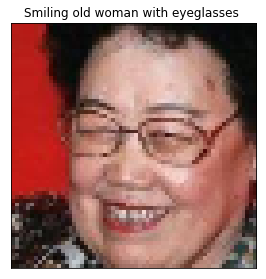

In [4]:
cd = ConditionDescriber(conf.conditions)
y = cd.create_y(Male=False, Smiling=True, Young=False, Eyeglasses=True)
#y = np.array([0, 1, 0, 0, 0])*2 - 1
idx = data.find_image(y)
img, z, y_new = data[idx]
print(y_new)
plot_batch([img], normalize=True, limit=1, descriptions=[cd.describe(y)])

In [5]:
generator = Generator5Net(conf.Z_SIZE, conf.Y_SIZE).cuda()
discriminator = Discriminator5(conf.Y_SIZE).cuda()

loss_on_real: tensor(0.4805, device='cuda:1')
loss_on_fake: tensor(0.3517, device='cuda:1')
loss_on_real: tensor(0.4923, device='cuda:1')
loss_on_fake: tensor(0.3201, device='cuda:1')
loss_on_real: tensor(0.6367, device='cuda:1')
loss_on_fake: tensor(0.1691, device='cuda:1')
loss_on_real: tensor(0.5435, device='cuda:1')
loss_on_fake: tensor(0.3397, device='cuda:1')
loss_on_real: tensor(0.5312, device='cuda:1')
loss_on_fake: tensor(0.3306, device='cuda:1')
loss_on_real: tensor(0.7161, device='cuda:1')
loss_on_fake: tensor(0.2434, device='cuda:1')
loss_on_real: tensor(0.6228, device='cuda:1')
loss_on_fake: tensor(0.5281, device='cuda:1')
loss_on_real: tensor(0.7200, device='cuda:1')
loss_on_fake: tensor(0.1944, device='cuda:1')
loss_on_real: tensor(0.5058, device='cuda:1')
loss_on_fake: tensor(0.5839, device='cuda:1')
loss_on_real: tensor(0.4761, device='cuda:1')
loss_on_fake: tensor(0.3289, device='cuda:1')
loss_on_real: tensor(1.1190, device='cuda:1')
loss_on_fake: tensor(0.1402, devic

loss_on_real: tensor(0.4177, device='cuda:1')
loss_on_fake: tensor(0.6784, device='cuda:1')
loss_on_real: tensor(1.0234, device='cuda:1')
loss_on_fake: tensor(1.00000e-02 *
       9.5245, device='cuda:1')
loss_on_real: tensor(0.4996, device='cuda:1')
loss_on_fake: tensor(0.2596, device='cuda:1')
loss_on_real: tensor(0.4905, device='cuda:1')
loss_on_fake: tensor(0.5588, device='cuda:1')
loss_on_real: tensor(0.6454, device='cuda:1')
loss_on_fake: tensor(0.2114, device='cuda:1')
loss_on_real: tensor(0.5617, device='cuda:1')
loss_on_fake: tensor(0.3714, device='cuda:1')
loss_on_real: tensor(0.6215, device='cuda:1')
loss_on_fake: tensor(0.2293, device='cuda:1')
loss_on_real: tensor(0.7389, device='cuda:1')
loss_on_fake: tensor(0.3280, device='cuda:1')
loss_on_real: tensor(0.7472, device='cuda:1')
loss_on_fake: tensor(0.4249, device='cuda:1')
loss_on_real: tensor(0.5541, device='cuda:1')
loss_on_fake: tensor(0.4785, device='cuda:1')
loss_on_real: tensor(0.8205, device='cuda:1')
loss_on_fake:

Process Process-18:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/red-haired/programming/inpainting/venv/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

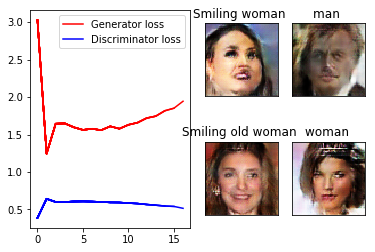

In [6]:
callback = cGanPlotLossCallback(generator, discriminator, y_sampler)
train(generator, discriminator, data_loader, y_sampler=y_sampler,
      n_epochs=280, config=conf, callback_func=callback)


In [9]:
LOAD_MODEL = True
LOAD_EPOCH_N = 16
if LOAD_MODEL:
    generator.load_state_dict(torch.load(conf.MODEL_PATH + 'generator_%d.pth' % (LOAD_EPOCH_N,)))
    discriminator.load_state_dict(torch.load(conf.MODEL_PATH + 'discriminator_%d.pth' % (LOAD_EPOCH_N,)))
    generator.eval()
    discriminator.eval()

<class 'numpy.dtype'>
D_real:  0.3187640905380249 D_fake:  0.36767807602882385
D_logit_real:  -0.7594574093818665 D_logit_fake:  -0.5421908497810364
Discriminator loss:  0.7533642053604126
0.8542010188102722


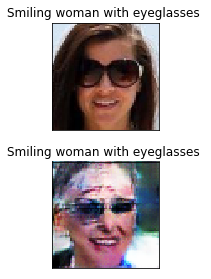

In [32]:
scalar = lambda v: np.asscalar(v.data.cpu().numpy())

Z = torch.normal(mean=torch.zeros(1, generator.z_size)).cuda()
        # 'Male', 'Smiling', 'Young', 'Eyeglasses', 'Wearing_Hat'
y = cd.create_y(Male=False, Smiling=True, Young=True, Eyeglasses=True)
print(dtype)
idx = data.find_image(y)
img, z, y_new = data[idx]
X = torch.tensor([img]).cuda()
y = y.astype(np.float32)
Y = torch.tensor([
                  y]).cuda()

G_sample = generator(Z, Y)
D_real, D_logit_real = discriminator(X, Y)
D_fake, D_logit_fake = discriminator(G_sample, Y)

generator_loss = GeneratorLoss()
discriminator_loss = DiscriminatorLoss(label_smoothing=0.25)

print("D_real: ", scalar(D_real), "D_fake: ", scalar(D_fake))
print("D_logit_real: ", scalar(D_logit_real), "D_logit_fake: ", scalar(D_logit_fake))

d_loss = discriminator_loss(D_logit_real, D_logit_fake)

print("Discriminator loss: ", scalar(d_loss))
print(scalar(discriminator_loss(torch.tensor([10.0]).cuda(), D_logit_fake)))
sample = np.concatenate((img[None, :, :, :], G_sample.data.cpu().numpy()))
plot_batch(sample, normalize=True, descriptions=[cd.describe(y)]*2)

In [22]:
w = discriminator.layer4.weight.data.cpu().numpy()
print(w.shape)
print(w[:, 0:5])
print(w[:, 5:])

(512, 2053)
[[ 0.01554645  0.02032025  0.00143471  0.0038483  -0.00529829]
 [-0.03188054 -0.02318389 -0.02618426 -0.00899511  0.01439983]
 [-0.03647373 -0.00656386 -0.04217547 -0.02781066  0.00478457]
 ...
 [-0.01947122 -0.00213318 -0.0036031  -0.02508001 -0.00835117]
 [-0.06232508 -0.02944893 -0.06935065 -0.01845303  0.00534541]
 [-0.0525102  -0.01250224 -0.07524186 -0.02540252 -0.00511885]]
[[-9.7149508e-03 -1.9994663e-02  6.3385308e-02 ... -4.4556791e-03
  -1.3378766e-02  2.0948390e-02]
 [-8.9147955e-04  1.8127413e-02 -3.3329945e-02 ...  7.9313926e-05
  -8.1581539e-03  4.2191874e-03]
 [ 2.7409377e-02  3.9739091e-02 -1.8370131e-02 ... -2.5575187e-02
  -7.2298502e-03 -9.6715512e-03]
 ...
 [ 2.2590490e-02  2.5505329e-02 -2.5389183e-02 ...  1.4360134e-03
   8.4755644e-03 -2.9266715e-02]
 [ 1.1769312e-02 -2.1008134e-03 -7.3844707e-03 ...  3.7578389e-03
  -3.4077775e-03  5.9372718e-03]
 [ 3.6658183e-02  1.0639926e-02  1.8218599e-02 ...  7.1510728e-03
  -1.6319398e-02 -2.2904970e-02]]
